In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from utils.utils import bar_chart, cat_map, chor_map

#setting the display options for Pandas to ensure we see all the fields in our dataset
pd.options.display.max_rows = 100
pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
dc_nbrhds_geo = gpd.read_file('data/dcgis/Neighborhood_Clusters.geojson')
abnb_dc_geo = gpd.read_file('data/abnb_dc_listing_geo.json')

In [3]:
abnb_dc_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6671 entries, 0 to 6670
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      6671 non-null   int64   
 1   neighbourhood_cleansed  6671 non-null   object  
 2   latitude                6671 non-null   float64 
 3   longitude               6671 non-null   float64 
 4   property_type           6671 non-null   object  
 5   room_type               6671 non-null   object  
 6   accommodates            6671 non-null   int64   
 7   bathrooms               6671 non-null   float64 
 8   bedrooms                6671 non-null   float64 
 9   beds                    6671 non-null   float64 
 10  price                   6671 non-null   float64 
 11  minimum_nights          6671 non-null   int64   
 12  maximum_nights          6671 non-null   int64   
 13  number_of_reviews       6671 non-null   int64   
 14  index_right     

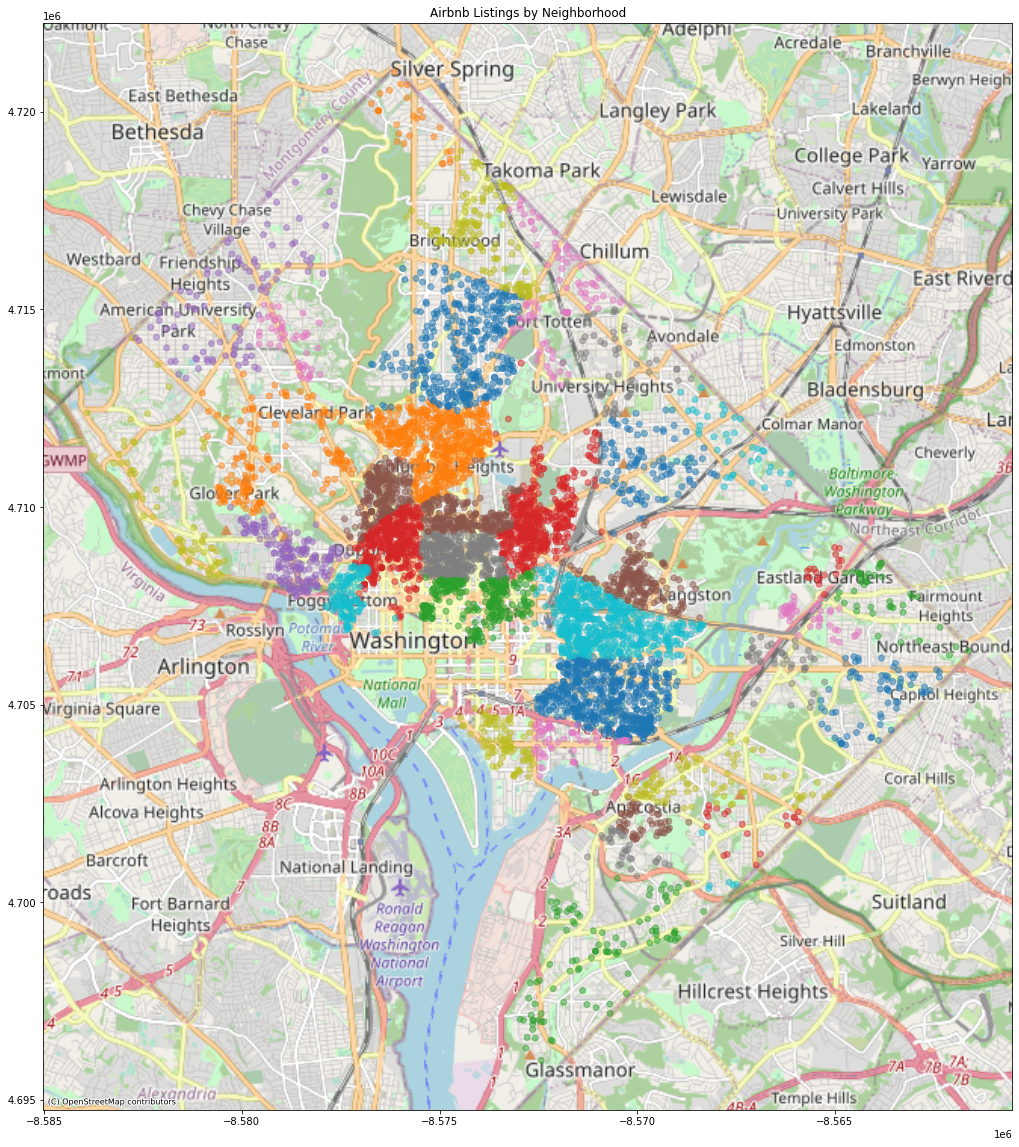

In [4]:
cat_map(abnb_dc_geo,'NBH_NAMES','Airbnb Listings by Neighborhood')

In [5]:
abnb_dc_geo_mean_prc_nbrhood = abnb_dc_geo.groupby("NBH_NAMES")["price"].mean()
dc_nbrhds_geo_MEAN_PRC_NBRHD = dc_nbrhds_geo.merge(abnb_dc_geo_mean_prc_nbrhood, on="NBH_NAMES")

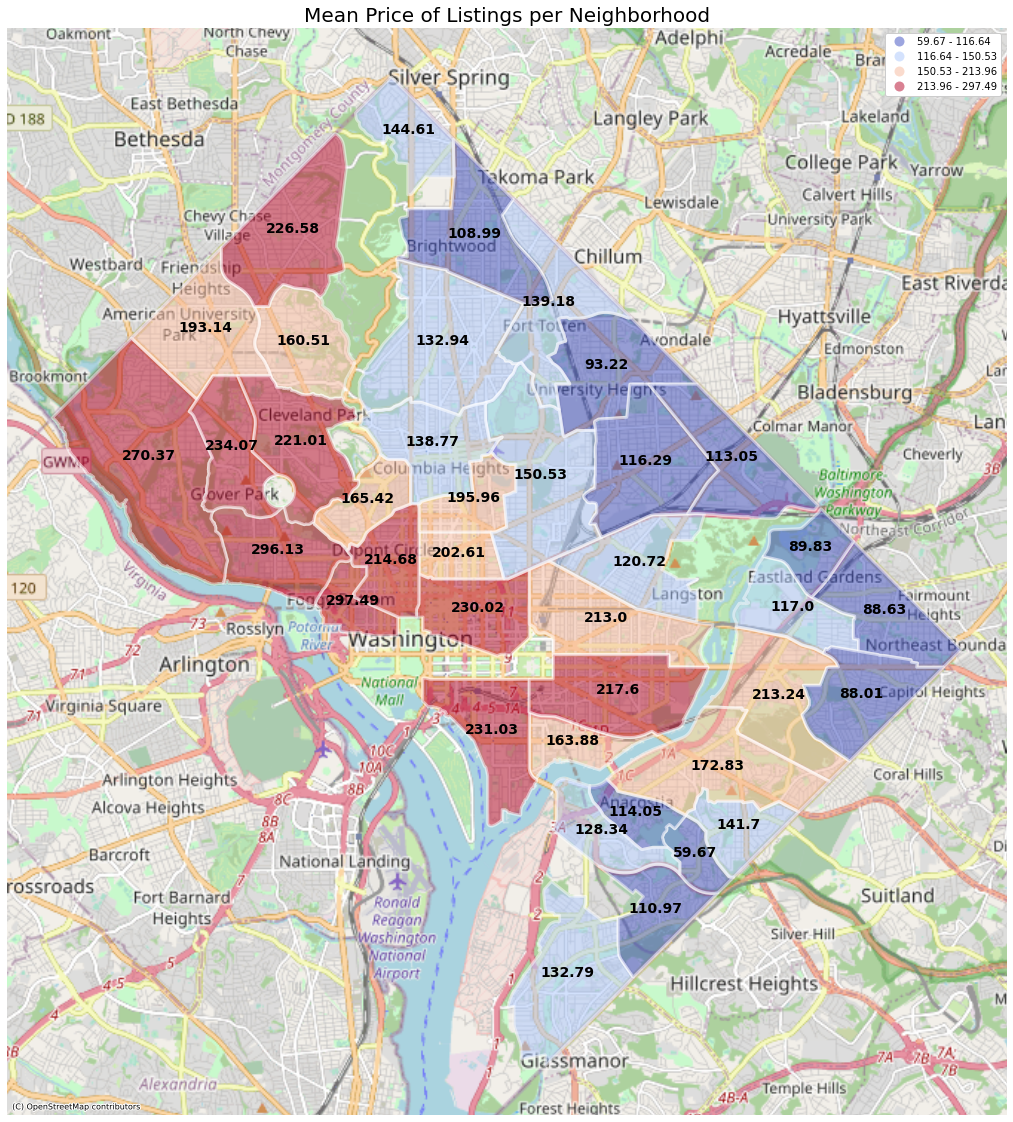

In [7]:
chor_map(gdf=dc_nbrhds_geo_MEAN_PRC_NBRHD, column='price', title='Mean Price of Listings per Neighborhood')

In [8]:
abnb_dc_geo_num_lstng_nbrhd = abnb_dc_geo.groupby('NBH_NAMES')['id'].count()
dc_nbrhds_geo_NUM_LSTNG_NBRHD = dc_nbrhds_geo.merge(abnb_dc_geo_num_lstng_nbrhd, on="NBH_NAMES")

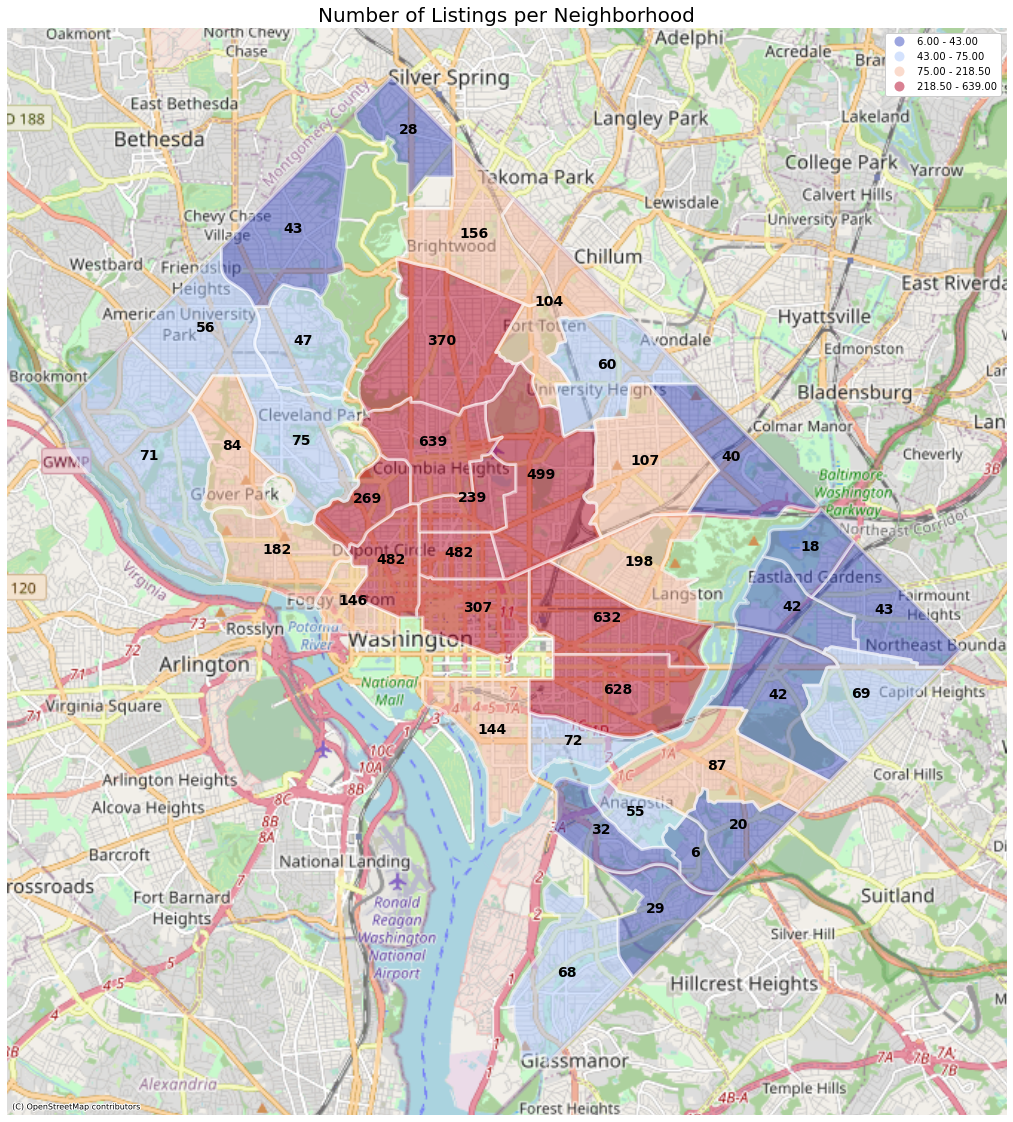

In [9]:
chor_map(gdf=dc_nbrhds_geo_NUM_LSTNG_NBRHD, column='id', title='Number of Listings per Neighborhood')

In [56]:
abnb_dc_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6671 entries, 0 to 6670
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      6671 non-null   int64   
 1   neighbourhood_cleansed  6671 non-null   object  
 2   latitude                6671 non-null   float64 
 3   longitude               6671 non-null   float64 
 4   property_type           6671 non-null   object  
 5   room_type               6671 non-null   object  
 6   accommodates            6671 non-null   int64   
 7   bathrooms               6671 non-null   float64 
 8   bedrooms                6671 non-null   float64 
 9   beds                    6671 non-null   float64 
 10  price                   6671 non-null   float64 
 11  minimum_nights          6671 non-null   int64   
 12  maximum_nights          6671 non-null   int64   
 13  number_of_reviews       6671 non-null   int64   
 14  index_right     

In [12]:
X = abnb_dc_geo[[ 'neighbourhood_cleansed','room_type','accommodates','bathrooms','bedrooms','beds','minimum_nights','maximum_nights','number_of_reviews']]
X = pd.get_dummies(data=X, drop_first=True)

In [13]:
X.head()

accommodates  bathrooms  bedrooms  beds  minimum_nights  maximum_nights  \
0             1        1.0       1.0   1.0               2             365   
1             2        1.0       1.0   1.0               2            1125   
2             2        2.0       1.0   1.0               2             120   
3             2        1.0       1.0   1.0               2              60   
4             1        1.0       1.0   1.0               2               6   

   number_of_reviews  neighbourhood_cleansed_Brookland, Brentwood, Langdon  \
0                 73                                                  0      
1                 38                                                  0      
2                103                                                  0      
3                 11                                                  0      
4                 36                                                  0      

   neighbourhood_cleansed_Capitol Hill, Lincoln Park  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   neighbourhood_cleansed_Capitol View, Marshall Heights, Benning Heights  \
0                                                  0                        
1                                                  0                        
2                                                  0                        
3                                                  0                        
4                                                  0                        

   neighbourhood_cleansed_Cathedral Heights, McLean Gardens, Glover Park  \
0                                                  0                       
1                                                  0                       
2                                                  0                       
3                                                  0                       
4                                                  0                       

   neighbourhood_cleansed_Cleveland Park, Woodley Park, Massachusetts Avenue Heights, Woodland-Normanstone Terrace  \
0                                                  0                                                                 
1                                                  0                                                                 
2                                                  0                                                                 
3                                                  0                                                                 
4                                                  0                                                                 

   neighbourhood_cleansed_Colonial Village, Shepherd Park, North Portal Estates  \
0                                                  0                              
1                                                  0                              
2                                                  0                              
3                                                  0                              
4                                                  0                              

   neighbourhood_cleansed_Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View  \
0                                                  0                                   
1                                                  0                                   
2                                                  0                                   
3                                                  0                                   
4                                                  0                                   

   neighbourhood_cleansed_Congress Heights, Bellevue, Washington Highla

In [14]:
y = abnb_dc_geo[['price']]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
print(X_train.shape)
print(X_test.shape)

(4669, 48)
(2002, 48)


In [17]:
print(y_train.shape)
print(y_test.shape)

(4669, 1)
(2002, 1)


In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train,y_train)

LinearRegression()

In [20]:
print(model.intercept_)

[-49.84074461]


In [21]:
predictions = model.predict(X_test)
predictions

array([[329.88095392],
       [203.08579306],
       [194.59204645],
       ...,
       [227.0370281 ],
       [ 43.19236561],
       [180.99485631]])

/Users/njackson/anaconda3/envs/dsnd/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


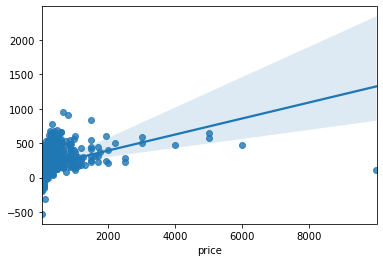

In [22]:
import seaborn as sns
sns.regplot(y_test,predictions);

In [23]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     19.46
Date:                Sat, 09 Jan 2021   Prob (F-statistic):          2.86e-148
Time:                        23:48:35   Log-Likelihood:                -33034.
No. Observations:                4669   AIC:                         6.617e+04
Df Residuals:                    4620   BIC:                         6.648e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [59]:
X.corr().head()

accommodates  bathrooms  bedrooms      beds  minimum_nights  \
accommodates        1.000000   0.478153  0.777266  0.710757       -0.087489   
bathrooms           0.478153   1.000000  0.522859  0.586474       -0.009537   
bedrooms            0.777266   0.522859  1.000000  0.702877       -0.053787   
beds                0.710757   0.586474  0.702877  1.000000       -0.074038   
minimum_nights     -0.087489  -0.009537 -0.053787 -0.074038        1.000000   

                maximum_nights  number_of_reviews  \
accommodates          0.001702           0.048925   
bathrooms             0.014559          -0.073111   
bedrooms              0.006363          -0.060503   
beds                  0.000505           0.004790   
minimum_nights       -0.004045          -0.128458   

                neighbourhood_cleansed_Brookland, Brentwood, Langdon  \
accommodates                                             0.000412      
bathrooms                                               -0.011437      
bedrooms                                                 0.012114      
beds                                                    -0.001828      
minimum_nights                                          -0.016682      

                neighbourhood_cleansed_Capitol Hill, Lincoln Park  \
accommodates                                             0.057250   
bathrooms                                               -0.015014   
bedrooms                                                 0.007432   
beds                                                     0.077401   
minimum_nights                                           0.006314   

                neighbourhood_cleansed_Capitol View, Marshall Heights, Benning Heights  \
accommodates                                            -0.016859                        
bathrooms                                               -0.007506                        
bedrooms                                                 0.004571                        
beds                                                    -0.004616                        
minimum_nights                                          -0.021813                        

                neighbourhood_cleansed_Cathedral Heights, McLean Gardens, Glover Park  \
accommodates                                            -0.000965                       
bathrooms                                                0.004241                       
bedrooms                                                 0.008946                       
beds                                                    -0.000127                       
minimum_nights                                          -0.011701                       

                neighbourhood_cleansed_Cleveland Park, Woodley Park, Massachusetts Avenue Heights, Woodland-Normanstone Terrace  \
accommodates                                             0.000242                                                                 
bathrooms                                                0.014350                                                                 
bedrooms                                                 0.016346                                                                 
beds                                                     0.011258                                                                 
minimum_nights                                          -0.007115                                                                 

                neighbourhood_cleansed_Colonial Village, Shepherd Park, North Portal Estates  \
accommodates                                            -0.008834                              
bathrooms                                                0.010291                              
bedrooms                                                 0.004325                              
beds                                                     0.004095                              
minimum_nights                 

In [60]:
X2 = abnb_dc_geo[['room_type','accommodates','bathrooms','bedrooms','beds','number_of_reviews']]
X2 = pd.get_dummies(data=X2, drop_first=True)

In [61]:
X2.head()

accommodates  bathrooms  bedrooms  beds  number_of_reviews  \
0             1        1.0       1.0   1.0                 73   
1             2        1.0       1.0   1.0                 38   
2             2        2.0       1.0   1.0                103   
3             2        1.0       1.0   1.0                 11   
4             1        1.0       1.0   1.0                 36   

   room_type_Hotel room  room_type_Private room  room_type_Shared room  
0                     0                       1                      0  
1                     0                       1                      0  
2                     0                       1                      0  
3                     0                       1                      0  
4                     0                       1                      0

In [62]:
y2 = abnb_dc_geo[['price']]

In [63]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [64]:
print(X2_train.shape)
print(X2_test.shape)

(5336, 8)
(1335, 8)


In [65]:
print(y2_train.shape)
print(y2_test.shape)

(5336, 1)
(1335, 1)


In [66]:
model = LinearRegression()

In [67]:
model.fit(X2_train,y2_train)

LinearRegression()

In [68]:
print(model.intercept_)

[16.73082247]


In [69]:
predictions = model.predict(X2_test)
predictions

array([[ 85.903839  ],
       [ 71.68997624],
       [191.15689426],
       ...,
       [244.36246674],
       [196.46213695],
       [301.7360491 ]])

/Users/njackson/anaconda3/envs/dsnd/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


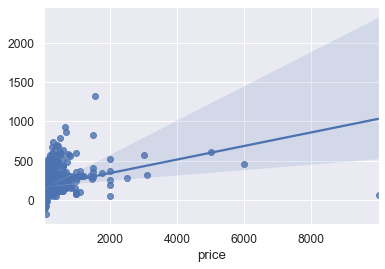

In [70]:
import seaborn as sns
sns.regplot(y2_test,predictions);

In [71]:
import statsmodels.api as sm
X2_train_Sm= sm.add_constant(X2_train)
X2_train_Sm= sm.add_constant(X2_train)
ls=sm.OLS(y2_train,X2_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     111.3
Date:                Sat, 09 Jan 2021   Prob (F-statistic):          1.37e-172
Time:                        23:59:03   Log-Likelihood:                -37859.
No. Observations:                5336   AIC:                         7.574e+04
Df Residuals:                    5327   BIC:                         7.579e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     16

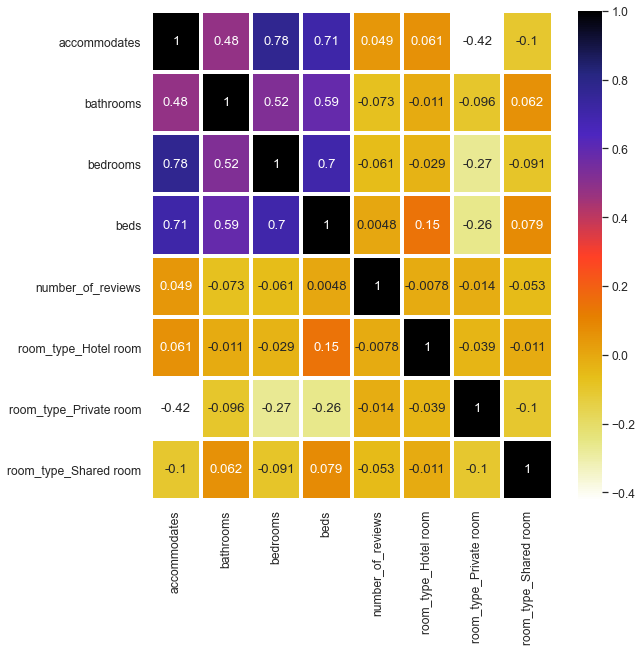

In [76]:
sns.set(font_scale=1.1)

fig, ax = plt.subplots(figsize=(9,9))# Sample figsize in inches
# ax.set_xlabel()
sns.heatmap(X2.corr(),annot=True,lw=3,cmap="CMRmap_r", fmt='.2g', ax=ax)
fig.savefig("x2_corr_heatmap.png",bbox_inches='tight')

In [77]:
X3 = abnb_dc_geo[[ 'room_type','bathrooms','bedrooms','number_of_reviews']]
X3 = pd.get_dummies(data=X3, drop_first=True)

In [78]:
X3.head()

bathrooms  bedrooms  number_of_reviews  room_type_Hotel room  \
0        1.0       1.0                 73                     0   
1        1.0       1.0                 38                     0   
2        2.0       1.0                103                     0   
3        1.0       1.0                 11                     0   
4        1.0       1.0                 36                     0   

   room_type_Private room  room_type_Shared room  
0                       1                      0  
1                       1                      0  
2                       1                      0  
3                       1                      0  
4                       1                      0

In [79]:
y3 = abnb_dc_geo[['price']]

In [80]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [81]:
print(X3_train.shape)
print(X3_test.shape)

(5336, 6)
(1335, 6)


In [82]:
print(y3_train.shape)
print(y3_test.shape)

(5336, 1)
(1335, 1)


In [83]:
model = LinearRegression()

In [84]:
model.fit(X3_train,y3_train)

LinearRegression()

In [85]:
print(model.intercept_)

[58.16298986]


In [86]:
predictions = model.predict(X3_test)
predictions

array([[106.86166451],
       [ 91.28371999],
       [197.44980678],
       ...,
       [239.39666497],
       [166.54332577],
       [291.53203112]])

/Users/njackson/anaconda3/envs/dsnd/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


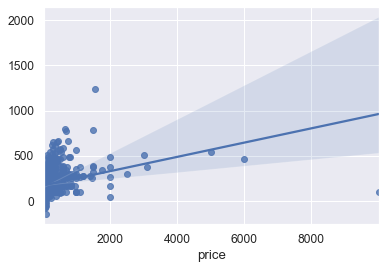

In [87]:
import seaborn as sns
sns.regplot(y3_test,predictions);

In [88]:
import statsmodels.api as sm
X3_train_Sm= sm.add_constant(X3_train)
X3_train_Sm= sm.add_constant(X3_train)
ls=sm.OLS(y3_train,X3_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     127.9
Date:                Sun, 10 Jan 2021   Prob (F-statistic):          1.11e-151
Time:                        00:05:06   Log-Likelihood:                -37912.
No. Observations:                5336   AIC:                         7.584e+04
Df Residuals:                    5329   BIC:                         7.588e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     58

In [89]:
X3.corr()

bathrooms  bedrooms  number_of_reviews  \
bathrooms                1.000000  0.522859          -0.073111   
bedrooms                 0.522859  1.000000          -0.060503   
number_of_reviews       -0.073111 -0.060503           1.000000   
room_type_Hotel room    -0.011268 -0.029304          -0.007850   
room_type_Private room  -0.095907 -0.269188          -0.013760   
room_type_Shared room    0.062354 -0.090620          -0.052638   

                        room_type_Hotel room  room_type_Private room  \
bathrooms                          -0.011268               -0.095907   
bedrooms                           -0.029304               -0.269188   
number_of_reviews                  -0.007850               -0.013760   
room_type_Hotel room                1.000000               -0.038516   
room_type_Private room             -0.038516                1.000000   
room_type_Shared room              -0.010736               -0.101757   

                        room_type_Shared room  
bathrooms                            0.062354  
bedrooms                            -0.090620  
number_of_reviews                   -0.052638  
room_type_Hotel room                -0.010736  
room_type_Private room              -0.101757  
room_type_Shared room                1.000000

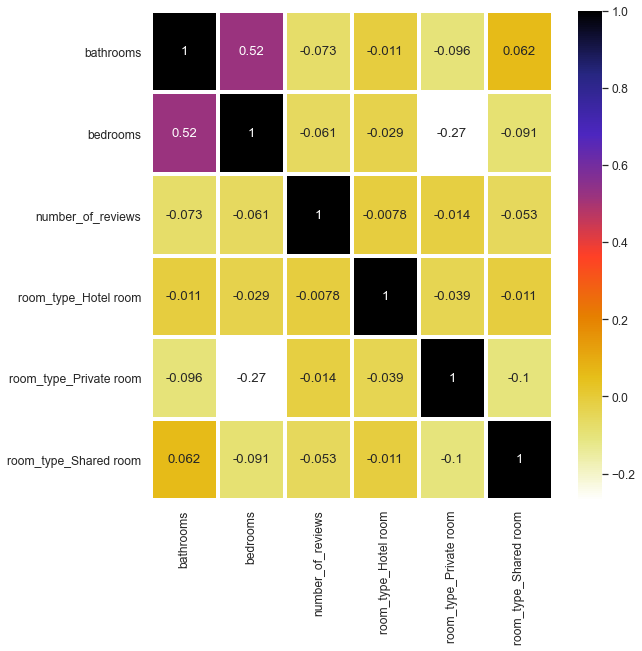

In [90]:
sns.set(font_scale=1.1)

fig, ax = plt.subplots(figsize=(9,9))# Sample figsize in inches
# ax.set_xlabel()
sns.heatmap(X3.corr(),annot=True,lw=3,cmap="CMRmap_r", fmt='.2g', ax=ax)
fig.savefig("x3_corr_heatmap.png",bbox_inches='tight')